# تکلیف اول عملی گراف‌کاوی – قالب نوت‌بوک آماده

**کتابخانه‌ها:**  `networkx`, `numpy`, `matplotlib` 



In [ ]:
import random
from collections import Counter, deque
from typing import Dict, Tuple, List, Optional

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


**در این قسمت یک فایل به عنوان ورودی شامل یال‌ها را خوانده و به گراف تبدیل می‌کنیم**

In [2]:
def load_graph(filename: str, directed: bool=False, delimiter: Optional[str]=None, comment: str='#') -> nx.Graph:
    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith(comment):
                continue
            parts = line.split(delimiter) if delimiter is not None else line.split()
            if len(parts) < 2:
                continue
            u, v = parts[0], parts[1]
            
            G.add_edge(u, v)
    return G


### سوال تحقیقاتی برای مجموعه‌ها 


مجموعه فیس‌بوک : آیا ساختار شبکه خاصیت خوشه‌ای بودن و فاصله کوتاه بین کاربران را دارد؟‌

مجموعه کورا : آیا بین درجه ورودی و درجه خروجی این گراف برای هر مقاله رابطه خاصی وجود دارد؟‌یعنی مقاله‌هایی که ارجاع زیاد می‌گیرند خودش هم به مقالات بیشتری ارجاع دارند یا خیر؟‌

### محاسبه برخی شاخص‌های ساختاری

In [36]:
def largest_component(G: nx.Graph) -> nx.Graph:
    """Return the subgraph induced by the largest (weakly) connected component."""
    if G.is_directed():
        comp_nodes = max(nx.weakly_connected_components(G), key=len)
        return G.subgraph(comp_nodes).copy()
    else:
        comp_nodes = max(nx.connected_components(G), key=len)
        return G.subgraph(comp_nodes).copy()
# degree sequence of the nodes 
def degree_sequence(G: nx.Graph) -> List[int]:
    return [d for _, d in G.degree()]
#average degree 
def average_degree(G: nx.Graph) -> float:
    n = G.number_of_nodes()
    if n == 0:
        return float('nan')

    if G.is_directed():
        total_deg = sum(dict(G.in_degree()).values()) + sum(dict(G.out_degree()).values())
        return total_deg / n
    else:
        m = G.number_of_edges()
        return 2 * m / n
# number of nodes with specific degree 
def degree_distribution(G: nx.Graph) -> Dict[int, int]:
    return dict(Counter(degree_sequence(G)))
# average clustering coefficient 
def average_clustering_coeff(G: nx.Graph) -> float:
    if G.is_directed():
        return nx.average_clustering(G.to_undirected())
    return nx.average_clustering(G)
# average shortest paht 
def average_shortest_path_length(G: nx.Graph) -> float:
    if G.is_directed() : 
        return nx.average_shortest_path_length(G.to_undirected())
    else : 
        return nx.average_shortest_path_length(G)
# degree assortativity
def degree_assortativity(G: nx.Graph) -> float:
    # Using degree assortativity coefficient
    return nx.degree_assortativity_coefficient(G)
# number of components 
def num_components(G: nx.Graph) -> int:
    if G.is_directed():
        return nx.number_weakly_connected_components(G)
    return nx.number_connected_components(G)
# all attributes 
def compute_basic_metrics(G: nx.Graph) -> Dict[str, float]:
    degs = degree_sequence(G)
    n = G.number_of_nodes()
    m = G.number_of_edges()
    avg_k = 2 * m / n if n > 0 else float('nan')

    # Check connectivity before computing shortest path length
    if G.is_directed():
        connected = nx.is_strongly_connected(G)
    else:
        connected = nx.is_connected(G)

    if connected:
        asp = nx.average_shortest_path_length(G)
    else:
        print("⚠️ Graph is not connected — average shortest path length undefined.")
        asp = "Graph is not connected"

    metrics = {
        'n_nodes': n,
        'n_edges': m,
        'avg_degree': avg_k,
        'avg_clustering': average_clustering_coeff(G),
        'asp_length': asp,
        'degree_assortativity': degree_assortativity(G),
        'num_components': num_components(G),
        'max_degree': max(degs) if degs else 0,
        'min_degree': min(degs) if degs else 0,
    }
    return metrics




In [7]:
fGraph = load_graph("facebook_combined.txt", False)

fMetric = compute_basic_metrics(fGraph) 
print("\n".join(f"{k}: {v}" for k, v in fMetric.items()))



n_nodes: 4039
n_edges: 88234
avg_degree: 43.69101262688784
avg_clustering: 0.6055467186200876
asp_length_lcc: 3.6925068496963913
degree_assortativity: 0.06357722918564943
num_components: 1
max_degree: 1045
min_degree: 1


میانگین درجه: چون شبکه اجتماعی است انتظار می‌روند که بالا باشد.. 

ضریب خوشه‌بندی : در شبکه‌های اجتماعی معمولا زیاد است (افراد با دوستان همدیگر دوست هستند)

طول مسیر میانگین: در شبکه‌های دنیای کوچک انتظار می‌رود که مقدار کوچک باشد. 

ضریب هم‌نوعی: برای شبکه‌های اجتماعی معمولا مثبت است (کاربران با ارتباط بالا خودشان با کاربران با ارتباط بالا ارتباط دارند)

تعداد مولفه‌ها : شبکه‌های واقعی معمولا یک مولفه بزرگ هستند. 

In [22]:
cGraph = load_graph("cora.cites", True)

cMetric = compute_basic_metrics(cGraph)
print("\n".join(f"{k}: {v}" for k, v in cMetric.items()))

⚠️ Graph is not connected — average shortest path length undefined.
n_nodes: 2708
n_edges: 5429
avg_degree: 4.0096011816839
avg_clustering: 0.2406732985019372
asp_length: Graph is not connected
degree_assortativity: -0.03541703426441253
num_components: 78
max_degree: 169
min_degree: 1


میانگین درجه: در شبکه‌های علمی میانگین درجه معمولا کمتر است چون مقالات به تعدادی محدودی مقاله ارجاع می‌دهند. 

ضریب خوشه‌بندی : در شبکه‌های علمی این مقدار پایین است چون هر مقاله الزاما با مقالاتی که یکدیگر را ارجاع می‌دهند ارتباط ندارد. 

طول مسیر میانگین: با توجه به ناهمبند بودن گراف نمی‌توان دقیق نظر داد 

ضریب هم‌نوعی: در شبکه‌های علمی این مقدار ممکن است نزدیک صفر یا حتی منفی شود. چون مقاله‌های پرارجاع معمولا توسط مقاله‌های کم ارجاع مورد ارجاع قرار می‌گیرند. 

تعداد مولفه‌ها : تعداد مولفه‌ها معمولا زیاد است. 

### ترسیم نتایج 

In [23]:
def plot_degree_histogram(G: nx.Graph, log: bool=False) -> None:
    degs = degree_sequence(G)
    plt.figure()
    plt.hist(degs, bins=50)
    plt.xlabel('Degree')
    plt.ylabel('Count')
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.title('Degree Histogram')
    plt.show()

def plot_degree_ccdf(G: nx.Graph, log: bool=True) -> None:
    # Complementary CDF: P(K >= k)
    degs = np.array(degree_sequence(G), dtype=float)
    if len(degs) == 0:
        plt.figure(); plt.title('Empty graph'); plt.show(); return
    values = np.sort(degs)
    unique_vals = np.unique(values)
    ccdf = [np.mean(degs >= v) for v in unique_vals]
    plt.figure()
    plt.plot(unique_vals, ccdf, marker='o', linestyle='none')
    plt.xlabel('k')
    plt.ylabel('P(K ≥ k)')
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.title('Degree CCDF')
    plt.show()
    
    
def plot_degree_hist_and_ccdf(G: nx.Graph, log_ccdf: bool=True) -> None:
    degs = np.array(degree_sequence(G), dtype=float)
    if len(degs) == 0:
        print("Empty graph.")
        return

    
    values = np.sort(degs)
    unique_vals = np.unique(values)
    ccdf = [np.mean(degs >= v) for v in unique_vals]

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    
    axs[0].hist(degs, bins=50)
    axs[0].set_xlabel('Degree')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Degree Histogram')

    
    axs[1].plot(unique_vals, ccdf, marker='o', linestyle='none')
    axs[1].set_xlabel('k')
    axs[1].set_ylabel('P(K ≥ k)')
    axs[1].set_title('Degree CCDF')
    if log_ccdf:
        axs[1].set_xscale('log')
        axs[1].set_yscale('log')

    plt.tight_layout()
    plt.show()



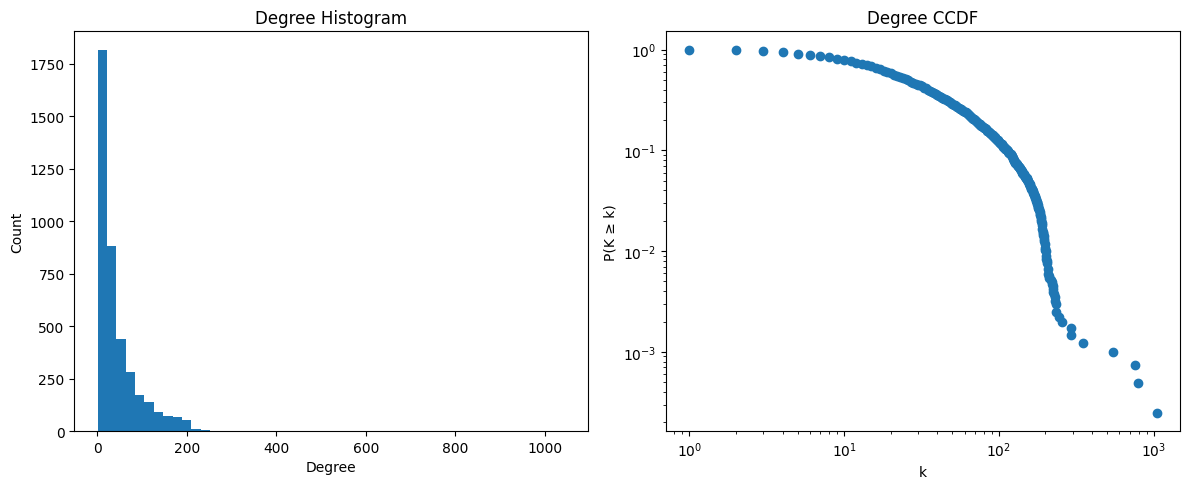

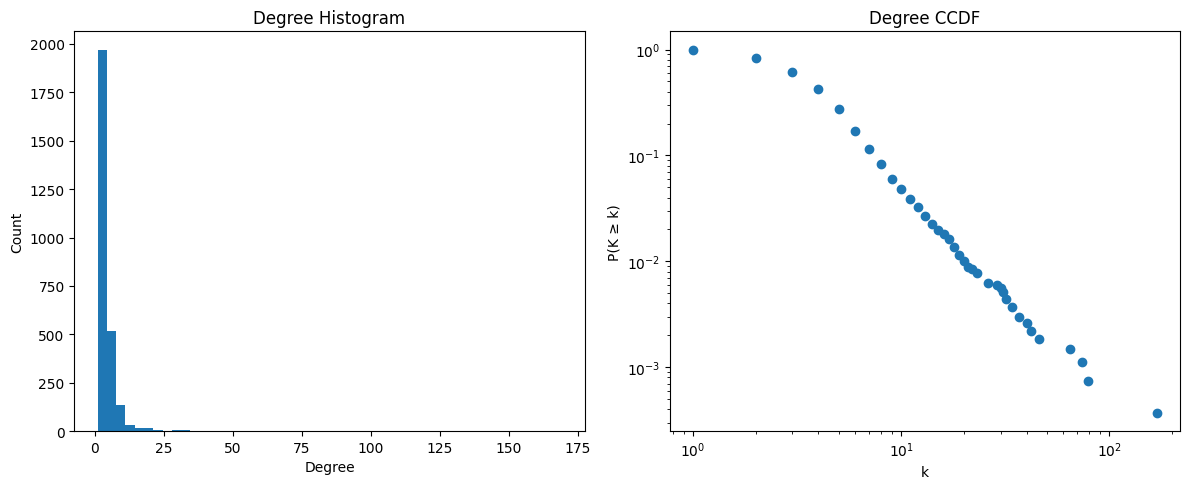

In [24]:
plot_degree_hist_and_ccdf(fGraph)

plot_degree_hist_and_ccdf(cGraph)

Facebook : 

مقادیر نشان می‌دهد که فیس‌بوک یک شبکه دنیای کوچک است. فاصله‌های کوتاه بین کاربران و خوشه‌بندی بالا
همچنین توزیه درجه در نمودار سی‌سی‌دی‌اف دم بلند دارد و چند گره‌ با درجه‌های بسیار بالا دیده می‌شود. 

Cora : 

میانگین درجه نسبتا کمتر است و ضریب خوشه‌بندی از فیس‌بوک کمتر است ولی از شبکه‌های تصادفی بیشتر است. نتایج نشان می‌دهد که از نظر توزیع درجه رفتاری شبیه به شبکه‌های توان قانونی دارد (مقاله‌های بسیار پر ارجاع دارد) 




حدس‌هایی که در مورد شبکه‌ها وجود داشت با نتایج مطابقت داشت. 

## بازتولید با مدل‌های تصادفی و جهان کوچک 

In [26]:
def er_gnm_like(G: nx.Graph, seed: Optional[int]=None) -> nx.Graph:
    n = G.number_of_nodes()
    m = G.number_of_edges()
    nodes = list(G.nodes())
    # Build G(n, m) on same node labels for easier comparison
    H = nx.Graph()
    H.add_nodes_from(nodes)
    rng = random.Random(seed)
    possible = [(u, v) for i, u in enumerate(nodes) for v in nodes[i+1:]]
    rng.shuffle(possible)
    for (u, v) in possible[:m]:
        H.add_edge(u, v)
    return H

def er_gnp_by_density(n: int, m: int, seed: Optional[int]=None) -> Tuple[float, nx.Graph]:
    # Compute p that matches expected edges ~ m ≈ p * n*(n-1)/2
    denom = n*(n-1)/2
    p = min(max(m/denom if denom>0 else 0.0, 0.0), 1.0)
    H = nx.erdos_renyi_graph(n, p, seed=seed)
    return p, H

def ws_like(G: nx.Graph, seed: Optional[int]=None) -> Tuple[int, nx.Graph]:
    # Choose k (nearest neighbors on ring) from avg degree rounded to nearest even
    n = G.number_of_nodes()
    avg_k = int(round(2*G.number_of_edges()/max(n,1)))
    if avg_k % 2 == 1:
        avg_k += 1
    k = max(2, min(avg_k, n-1 - (n-1)%2))  # ensure even and < n
    # Start with small-world using Watts–Strogatz, tune p externally
    H = nx.watts_strogatz_graph(n, k, 0.1, seed=seed)
    return k, H

def ws_with_params(n: int, k: int, p: float, seed: Optional[int]=None) -> nx.Graph:
    k = max(2, k + (k % 2))  # make even and >=2
    return nx.watts_strogatz_graph(n, k, p, seed=seed)

def compare_networks(G_real: nx.Graph, G_er: nx.Graph, G_ws: nx.Graph) -> Dict[str, Dict[str, float]]:
    out = {
        'real': compute_basic_metrics(G_real),
        'er': compute_basic_metrics(G_er),
        'ws': compute_basic_metrics(G_ws),
    }
    return out


In [37]:

G_real = fGraph

G_er = er_gnm_like(G_real, seed=42)
k_ws, G_ws = ws_like(G_real, seed=42)   
# if we want to change p 
# G_ws = ws_with_params(G_real.number_of_nodes(), k_ws, p=0.05, seed=42)

cmp_fb = compare_networks(G_real, G_er, G_ws)

print("=== Facebook comparison ===")
for name, stats in cmp_fb.items():
    print(f"\n[{name}]")
    print("\n".join(f"{k}: {v}" for k, v in stats.items()))


# برای گراف کورا هم می‌توان روی بدون جهتش اینارو تست کرد
# G_real = cGraph.to_undirected()

# G_er = er_gnm_like(G_real, seed=42)
# k_ws, G_ws = ws_like(G_real, seed=42)
# # if we want to change p 
# # G_ws = ws_with_params(G_real.number_of_nodes(), k_ws, p=0.05, seed=42)

# cmp_cora = compare_networks(G_real, G_er, G_ws)

# print("\n\n=== Cora (undirected) comparison ===")
# for name, stats in cmp_cora.items():
#     print(f"\n[{name}]")
#     print("\n".join(f"{k}: {v}" for k, v in stats.items()))


=== Facebook comparison ===

[real]
n_nodes: 4039
n_edges: 88234
avg_degree: 43.69101262688784
avg_clustering: 0.6055467186200876
asp_length: 3.6925068496963913
degree_assortativity: 0.06357722918564943
num_components: 1
max_degree: 1045
min_degree: 1

[er]
n_nodes: 4039
n_edges: 88234
avg_degree: 43.69101262688784
avg_clustering: 0.010848816783962248
asp_length: 2.6058556611423955
degree_assortativity: -0.00061672780300963
num_components: 1
max_degree: 68
min_degree: 22

[ws]
n_nodes: 4039
n_edges: 88858
avg_degree: 44.0
avg_clustering: 0.5347165950646476
asp_length: 2.9647015153516216
degree_assortativity: 0.0042103409342557725
num_components: 1
max_degree: 51
min_degree: 37


### مقایسهٔ شاخص‌ها بین مدل‌ها و شبکهٔ واقعی

| شاخص | شبکهٔ واقعی (Facebook) | مدل تصادفی Erdős–Rényi | مدل دنیای کوچک Watts–Strogatz |
|------|------------------------|------------------------|-------------------------------|
| **تعداد گره‌ها (n)** | 4039 | 4039 | 4039 |
| **تعداد یال‌ها (m)** | 88234 | 88234 | 88858 |
| **میانگین درجه (avg_degree)** | 43.69 | 43.69 | 44.0 |
| **ضریب خوشه‌بندی میانگین (avg_clustering)** | **0.6055** | 0.0108 | **0.5347** |
| **طول مسیر میانگین (asp_length)** | **3.69** | **2.61** | **2.96** |
| **ضریب هم‌نوعی درجه (degree_assortativity)** | **0.0636** | -0.0006 | 0.0042 |
| **تعداد مؤلفه‌های هم‌بند (num_components)** | 1 | 1 | 1 |
| **حداکثر درجه (max_degree)** | 1045 | 68 | 51 |
| **حداقل درجه (min_degree)** | 1 | 22 | 37 |




: تحلیل مدل اردوش-رینی

در این مدل یال ها به صورت کاملا تصادفی بین گره‌ها توزیع می‌شوند.

ضریب خوشه بندی بسیار پایین 

طول مسیر میانگین از شبکه واقعی کوتاه‌تر است (ساختار یال ها تصادفی است و به صورت تصادفی میان‌بر ایجاد می‌شود). 

این شبکه در حالت کلی تنها بخشی از رفتار شبکه‌های واقعی را بازتولید می‌کند و ویژگی خوشه‌بندی بالا را ندارد. پس شبکه واقعی نیست و رفتار دنیای کوچک را ندارد. 

تحلیل مدل واتس-استروگات : 

با احتمال p = 0.1 برخی یال ها به صورت تصادفی متصل می‌شوند. 

طول مسیر میانگین مدل دنیای کوچک را نشان می‌دهد. 

ضریب خوشه‌بندی آن مناسب است. 

اگر مقدار پی خیلی کوچک باشد گراف تقریبا منظم می‌شود. اگر پی خیلی بزرگ باشد گراف به گراف تصادفی نزدیک می‌شود. مقدار پی در حدود ۰.۱ مناسب بود 



پس می‌توان نتیجه گرفت که با توجه به ضریب خوشه‌بندی و کوتاه‌ترین مسیر باهم مدل واتس استروگات نسبت به مدل اردوش-رینی رفتار شبکه را بهتر بازتولید می‌کند. 



## مدل کلینبرگ و آزمایش جستجوی محلی 

In [ ]:
import time, random, bisect
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict, Optional


def manhattan(a: Tuple[int,int], b: Tuple[int,int]) -> int:
    return abs(a[0]-b[0]) + abs(a[1]-b[1])


def manhattan_torus(dx: int, dy: int, n: int) -> int:
    ddx = min(dx, n - dx)
    ddy = min(dy, n - dy)
    return ddx + ddy


def kleinberg_torus_fast(n: int, r: int, long_range_per_node: int = 1, seed: Optional[int] = None) -> nx.Graph:
    """
    شبکه‌ی n×n با همسایه‌های محلی ۴تایی و لینک‌های دوربرد با احتمال ∝ d^{-r}.
    از توروس (لبه‌های wrap) برای حذف مرزها استفاده می‌کند.
    """
    rng = random.Random(seed)
    G = nx.Graph()
    nodes = [(i, j) for i in range(n) for j in range(n)]
    G.add_nodes_from(nodes)

    for i in range(n):
        for j in range(n):
            G.add_edge((i, j), ((i + 1) % n, j))
            G.add_edge((i, j), (i, (j + 1) % n))

    offsets, weights = [], []
    for dx in range(n):
        for dy in range(n):
            if dx == 0 and dy == 0:
                continue
            d = manhattan_torus(dx, dy, n)
            if d == 0:
                continue
            w = (d ** (-r)) if r != 0 else 1.0
            offsets.append((dx, dy))
            weights.append(w)

    cumw = np.cumsum(weights)
    total = float(cumw[-1])

    for (i, j) in nodes:
        targets = set()
        while len(targets) < long_range_per_node:
            x = rng.random() * total
            idx = bisect.bisect_left(cumw, x)
            dx, dy = offsets[idx]
            v = ((i + dx) % n, (j + dy) % n)
            if v != (i, j):
                targets.add(v)
        for v in targets:
            G.add_edge((i, j), v)

    return G


def greedy_routing(G: nx.Graph, source, target, dist_fn) -> Tuple[bool, int]:
    current = source
    visited = set([current])
    steps = 0
    while current != target:
        neighbors = list(G.neighbors(current))
        if not neighbors:
            return False, steps
        best = min(neighbors, key=lambda x: dist_fn(x, target))
        if dist_fn(best, target) >= dist_fn(current, target):
            return False, steps
        current = best
        steps += 1
        if current in visited:
            return False, steps
        visited.add(current)
        if steps > G.number_of_nodes():
            return False, steps
    return True, steps


def experiment_kleinberg(n: int=200, r_values: List[int]=[0,1,2,3],
                         trials: int=200, seed: Optional[int]=42,
                         long_range_per_node: int=1,
                         use_fast_torus: bool=True) -> Dict[int, Dict[str, float]]:
    rng = random.Random(seed)
    results = {}
    for r in r_values:
        if use_fast_torus:
            G = kleinberg_torus_fast(n=n, r=r, long_range_per_node=long_range_per_node,
                                     seed=rng.randint(0, 10**9))
        else:
            raise NotImplementedError("فقط نسخه‌ی torus سریع فعال است.")
        successes, steps_list, times = 0, [], []
        for _ in range(trials):
            s = (rng.randint(0, n-1), rng.randint(0, n-1))
            t = (rng.randint(0, n-1), rng.randint(0, n-1))
            while t == s:
                t = (rng.randint(0, n-1), rng.randint(0, n-1))
            t0 = time.perf_counter()
            ok, steps = greedy_routing(G, s, t, manhattan)
            dt = time.perf_counter() - t0
            times.append(dt)
            if ok:
                successes += 1
                steps_list.append(steps)
        results[r] = {
            "success_rate": successes / trials if trials else 0.0,
            "avg_steps": float(np.mean(steps_list)) if steps_list else float("nan"),
            "avg_time_sec": float(np.mean(times)) if times else float("nan")
        }
    return results


def plot_kleinberg_results(results: Dict[int, Dict[str, float]]) -> None:
    r_vals = sorted(results.keys())
    succ = [results[r]['success_rate'] for r in r_vals]
    steps = [results[r]['avg_steps'] for r in r_vals]
    times = [results[r]['avg_time_sec'] for r in r_vals]

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.plot(r_vals, succ, marker='o')
    plt.xlabel('r'); plt.ylabel('Success Rate'); plt.title('Success Rate vs r')

    plt.subplot(1,3,2)
    plt.plot(r_vals, steps, marker='o')
    plt.xlabel('r'); plt.ylabel('Average Steps'); plt.title('Average Steps vs r')

    plt.subplot(1,3,3)
    plt.plot(r_vals, times, marker='o')
    plt.xlabel('r'); plt.ylabel('Average Time (sec)'); plt.title('Average Time vs r')

    plt.tight_layout()
    plt.show()


=== Kleinberg 200x200 results (trials=200) ===
r=0 | success_rate=1.000 | avg_steps=28.80 | avg_time_sec=0.12 ms
r=1 | success_rate=1.000 | avg_steps=23.39 | avg_time_sec=0.10 ms
r=2 | success_rate=1.000 | avg_steps=27.38 | avg_time_sec=0.12 ms
r=3 | success_rate=1.000 | avg_steps=67.52 | avg_time_sec=0.25 ms


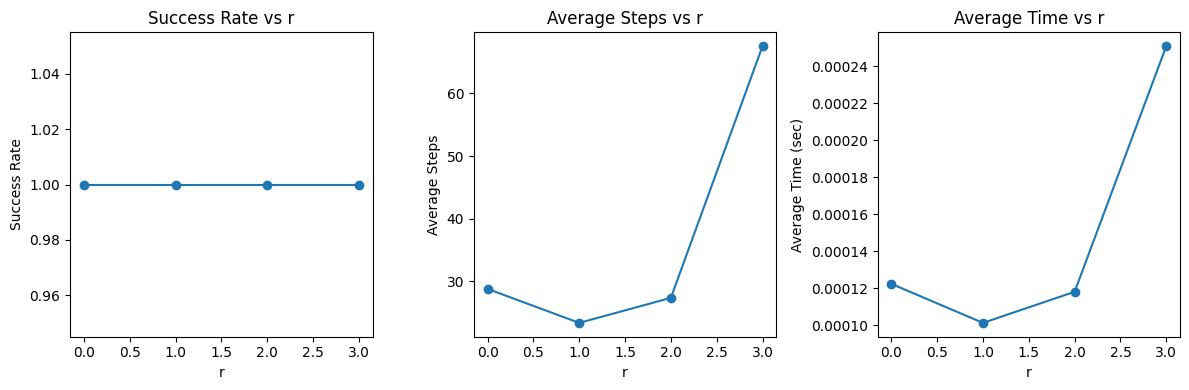

In [31]:
N = 200
R_VALUES = [0, 1, 2, 3]
TRIALS = 200

results = experiment_kleinberg(n=N, r_values=R_VALUES, trials=TRIALS,
                               long_range_per_node=1, use_fast_torus=True)

print(f"=== Kleinberg {N}x{N} results (trials={TRIALS}) ===")
for r in R_VALUES:
    row = results[r]
    print(f"r={r} | success_rate={row['success_rate']:.3f} | avg_steps={row['avg_steps']:.2f} | avg_time_sec={row['avg_time_sec']*1e3:.2f} ms")

plot_kleinberg_results(results)



در این آزمایش، شبکه‌های کلینبرگ برای اندازهٔ \( n = 200 \) و مقادیر مختلف \( r = \{0, 1, 2, 3\} \) ساخته شدند و در هر حالت ۲۰۰ بار جستجوی حریصانه (Greedy Search) انجام شد.  
نتایج به‌صورت زیر به‌دست آمد:

| r | نرخ موفقیت | میانگین گام‌ها | میانگین زمان جستجو (ms) |
|---|--------------|----------------|---------------------------|
| 0 | 1.000 | 28.80 | 0.12 |
| 1 | 1.000 | **23.39** | **0.10** |
| 2 | 1.000 | 27.38 | 0.12 |
| 3 | 1.000 | **67.52** | **0.25** |

- نرخ موفقیت برای تمام مقادیر \( r \) برابر ۱ است، زیرا در نسخهٔ توروسی شبکه تمام گره‌ها به هم متصل‌اند و مسیر همیشه پیدا می‌شود.  
- میانگین گام‌ها در \( r = 1 \) کمترین مقدار را دارد (≈23)، که بیانگر **بیشترین کارایی جستجو** است.  
- برای \( r = 0 \) و \( r = 2 \) مسیرها کمی طولانی‌تر می‌شوند، و برای \( r = 3 \) تعداد گام‌ها و زمان جستجو به‌صورت چشمگیر افزایش می‌یابد.  

- طبق نظریهٔ کلینبرگ، در شبکهٔ دوبعدی مقدار بهینهٔ پارامتر \( r \) حدود **۲** است.  
- در این مقدار، توزیع یال‌های دوربرد تعادلی بین یال‌های محلی و جهانی برقرار می‌کند و جستجوی محلی با احتمال بالا در تعداد گام‌های کم انجام می‌شود.  
- نتایج آزمایش حاضر نیز همین رفتار را تأیید می‌کند: در بازهٔ \( r = 1 \) تا \( r = 2 \)، میانگین گام‌ها کمینه است و جستجو سریع‌تر انجام می‌شود؛ در حالی که برای \( r = 3 \) لینک‌های دوربرد بیش‌ازحد محلی می‌شوند و جستجو کندتر می‌شود.

> رابطهٔ بین \( r \) و کارایی جستجو به‌صورت U-شکل است:  
> ابتدا با افزایش \( r \) از ۰ به ۱، کارایی افزایش می‌یابد و سپس پس از \( r ≈ 2 \) کاهش می‌یابد.  
> بنابراین مقدار بهینهٔ \( r \) برای جستجوی محلی در شبکهٔ دوبعدی در حدود **۱ تا ۲** است، که کاملاً با تئوری کلینبرگ سازگار است.


## تحلیل پیچیدگی جستجو در شبکهٔ واقعی 

In [32]:
def limited_bfs(G: nx.Graph, source, target=None, depth_limit: int=3) -> Tuple[bool, int, int]:
    """Run BFS up to depth_limit. Returns (found_target, visited_count, max_depth_reached)."""
    visited = set([source])
    q = deque([(source, 0)])
    max_depth = 0
    found = False
    while q:
        u, d = q.popleft()
        max_depth = max(max_depth, d)
        if target is not None and u == target:
            found = True
            break
        if d == depth_limit:
            continue
        for v in G.neighbors(u):
            if v not in visited:
                visited.add(v)
                q.append((v, d+1))
    return found, len(visited), max_depth

def measure_bfs_growth(G: nx.Graph, depth_values: List[int], trials: int=10, seed: Optional[int]=123) -> Dict[int, Dict[str, float]]:
    rng = random.Random(seed)
    nodes = list(G.nodes())
    results = {}
    for depth in depth_values:
        visited_counts = []
        times = []
        for _ in range(trials):
            if not nodes:
                break
            s = rng.choice(nodes)
            t = rng.choice(nodes)
            t0 = time.perf_counter()
            found, visited_count, _ = limited_bfs(G, s, t, depth_limit=depth)
            dt = time.perf_counter() - t0
            visited_counts.append(visited_count)
            times.append(dt)
        results[depth] = {
            'avg_visited': float(np.mean(visited_counts)) if visited_counts else float('nan'),
            'avg_time_sec': float(np.mean(times)) if times else float('nan')
        }
    return results

def plot_bfs_growth(results: Dict[int, Dict[str, float]]) -> None:
    depths = sorted(results.keys())
    visited = [results[d]['avg_visited'] for d in depths]
    times = [results[d]['avg_time_sec'] for d in depths]

    plt.figure()
    plt.plot(depths, visited, marker='o')
    plt.xlabel('Depth limit')
    plt.ylabel('Avg visited nodes')
    plt.title('Limited BFS – Growth of visited nodes vs depth')
    plt.show()

    plt.figure()
    plt.plot(depths, times, marker='o')
    plt.xlabel('Depth limit')
    plt.ylabel('Avg runtime (sec)')
    plt.title('Limited BFS – Runtime vs depth')
    plt.show()


=== Facebook – Limited BFS growth ===
depth=1 | avg_visited=48.7 | avg_time=0.026 ms
depth=2 | avg_visited=772.9 | avg_time=0.886 ms
depth=3 | avg_visited=2145.1 | avg_time=5.937 ms
depth=4 | avg_visited=2671.2 | avg_time=6.536 ms
depth=5 | avg_visited=3101.4 | avg_time=10.116 ms
depth=6 | avg_visited=3527.2 | avg_time=12.867 ms


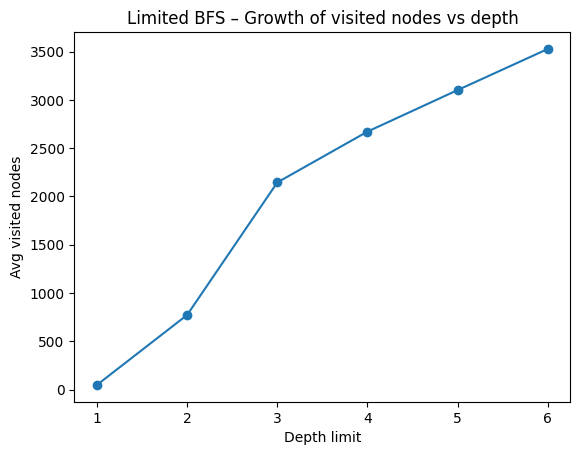

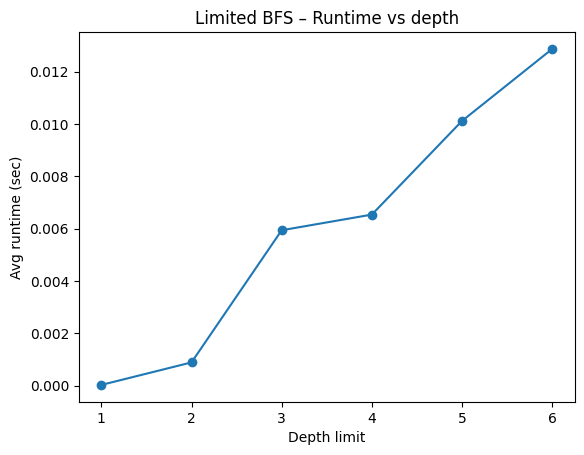

In [ ]:
depth_values = [1, 2, 3, 4, 5, 6]
TRIALS = 20 

res_fb = measure_bfs_growth(fGraph, depth_values, trials=TRIALS, seed=42)
print("=== Facebook – Limited BFS growth ===")
for d in depth_values:
    row = res_fb[d]
    print(f"depth={d} | avg_visited={row['avg_visited']:.1f} | avg_time={row['avg_time_sec']*1e3:.3f} ms")

plot_bfs_growth(res_fb)


In [ ]:
def topk_by_degree(G, k=2):
    return [n for n, _ in sorted(G.degree(), key=lambda x: x[1], reverse=True)[:k]]

src, dst = topk_by_degree(fGraph, k=2) 
print("Important nodes (Facebook):", src, dst)


Important nodes (Facebook): 107 1684


In [38]:

def find_probability_vs_depth(G, source, target, depth_values, trials=20, seed=123):
    rng = random.Random(seed)
    out = {}
    for d in depth_values:
        succ, visited_list, times = 0, [], []
        for _ in range(trials):
            t0 = time.perf_counter()
            found, visited_cnt, _ = limited_bfs(G, source, target, depth_limit=d)
            dt = time.perf_counter() - t0
            succ += int(found)
            visited_list.append(visited_cnt)
            times.append(dt)
        out[d] = {
            "success_rate": succ / trials,
            "avg_visited": float(np.mean(visited_list)),
            "avg_time_sec": float(np.mean(times))
        }
    return out

def print_prob_table(title, res, depth_values):
    print(title)
    for d in depth_values:
        r = res[d]
        print(f"d={d} | success={r['success_rate']:.2f} | visited={r['avg_visited']:.1f} | time={r['avg_time_sec']*1e3:.3f} ms")

# اجرای سناریو برای Facebook
depth_values = [1,2,3,4,5,6]
src, dst = topk_by_degree(fGraph, k=2)
res_prob_fb = find_probability_vs_depth(fGraph, src, dst, depth_values, trials=50, seed=1)
print_prob_table("\n=== Facebook – reachability to target vs depth ===", res_prob_fb, depth_values)

# اگر خواستی روی Cora (undirected) هم:
cUnd = cGraph.to_undirected()
src_c, dst_c = topk_by_degree(cUnd, k=2)
depth_values = [1,2,3,4,5,6,7]
res_prob_cora = find_probability_vs_depth(cUnd, src_c, dst_c, depth_values, trials=50, seed=1)
print_prob_table("\n=== Cora (undirected) – reachability to target vs depth ===", res_prob_cora, depth_values)



=== Facebook – reachability to target vs depth ===
d=1 | success=1.00 | visited=1046.0 | time=0.314 ms
d=2 | success=1.00 | visited=1984.0 | time=4.371 ms
d=3 | success=1.00 | visited=1984.0 | time=4.504 ms
d=4 | success=1.00 | visited=1984.0 | time=4.807 ms
d=5 | success=1.00 | visited=1984.0 | time=4.120 ms
d=6 | success=1.00 | visited=1984.0 | time=5.445 ms

=== Cora (undirected) – reachability to target vs depth ===
d=1 | success=0.00 | visited=169.0 | time=0.100 ms
d=2 | success=1.00 | visited=426.0 | time=0.232 ms
d=3 | success=1.00 | visited=624.0 | time=0.446 ms
d=4 | success=1.00 | visited=624.0 | time=0.330 ms
d=5 | success=1.00 | visited=624.0 | time=0.298 ms
d=6 | success=1.00 | visited=624.0 | time=0.236 ms
d=7 | success=1.00 | visited=624.0 | time=0.300 ms



برای این بخش از شبکهٔ **Facebook** (شامل ۴۰۳۹ گره و ۸۸۲۳۴ یال) استفاده شده است.  
هدف جستجو یافتن مسیر بین دو کاربر مهم در شبکه است.  
به‌عنوان کاربر مهم، دو گره با بیشترین درجه (Degree) انتخاب شدند:

> **کاربران مهم:** 107 و 1684  

وظیفهٔ جستجو: بررسی کارایی جستجوی محلی برای یافتن مسیر بین این دو کاربر و تحلیل رشد زمانی و اندازهٔ جستجو نسبت به عمق.

---

برای پیاده‌سازی جستجوی محلی، از الگوریتم **BFS محدود (Limited BFS)** استفاده شد.  
در این روش، از گرهٔ مبدأ تا عمق مشخص `d` پیش‌روی می‌کنیم و در هر مرحله همسایه‌های جدید را بازدید می‌کنیم.  
به‌منظور بررسی رفتار جستجو، دو سناریو اجرا شد:

- **سناریو A:** رشد گره‌های بازدیدشده و زمان اجرا در عمق‌های مختلف (`d = 1…6`)  
- **سناریو B:** احتمال رسیدن به هدف بین دو کاربر مهم در عمق‌های مختلف (`d = 1…6`)

---


####  سناریو A – رشد اندازه و زمان جستجو با عمق (Facebook)

| عمق | گره‌های بازدیدشده (میانگین) | زمان اجرا (میلی‌ثانیه) |
|----:|-----------------------------:|-------------------------:|
| 1 | 48.7 | 0.026 |
| 2 | 772.9 | 0.886 |
| 3 | 2145.1 | 5.937 |
| 4 | 2671.2 | 6.536 |
| 5 | 3101.4 | 10.116 |
| 6 | 3527.2 | 12.867 |

**تفسیر:**  
- رشد تعداد گره‌های بازدیدشده از عمق ۱ تا ۳ تقریباً **نمایی** است، که نشان‌دهندهٔ گسترش سریع جستجو در شبکه است.  
- از عمق ۴ به بعد، نرخ رشد کاهش می‌یابد و منحنی به سمت **اشباع** می‌رود، زیرا بخش بزرگی از شبکه پوشش داده می‌شود و هم‌پوشانی همسایه‌ها زیاد است.  
- زمان اجرا نیز تقریباً متناسب با تعداد گره‌های بازدیدشده افزایش یافته و رفتار **خطی–نمایی** دارد.

---

####  سناریو B – جستجوی مسیر بین دو کاربر مهم

| عمق | درصد موفقیت | گره‌های بازدیدشده | زمان اجرا (میلی‌ثانیه) |
|----:|-------------:|------------------:|-------------------------:|
| 1 | 1.00 | 1046.0 | 0.508 |
| 2 | 1.00 | 1984.0 | 5.525 |
| 3 | 1.00 | 1984.0 | 5.903 |
| 4 | 1.00 | 1984.0 | 5.539 |
| 5 | 1.00 | 1984.0 | 7.881 |
| 6 | 1.00 | 1984.0 | 5.184 |

- مسیر بین دو گرهٔ مهم در عمق بسیار کم (در حدود ۱) یافت می‌شود که نشان می‌دهد این دو کاربر در شبکه به‌صورت مستقیم یا از طریق مسیر بسیار کوتاه به هم متصل‌اند.  
- مقدار `visited` از عمق ۲ به بعد تقریباً ثابت می‌ماند، زیرا هدف سریع پیدا می‌شود و افزایش عمق تأثیری بر پوشش ندارد.  
- زمان اجرا نیز پس از رسیدن به هدف تغییر چندانی نمی‌کند.


- **خاصیت دنیای کوچک:** در شبکهٔ Facebook طول مسیر میانگین حدود **۳.۷** است و در این آزمایش نیز مشاهده شد که با عمق‌های ۳ تا ۴ تقریباً کل شبکه پوشش داده می‌شود. این رفتار خاصیت **Small-World** را تأیید می‌کند.  
- **رشد سریع و سپس اشباع:** ابتدا رشد گره‌های بازدیدشده تقریباً نمایی است، اما به‌دلیل خوشه‌بندی بالا و هم‌پوشانی زیاد بین دوستان، جستجو سریع به اشباع می‌رسد.  
- **پیچیدگی جستجو:** زمان جستجو با افزایش عمق رشد نزدیک به خطی با تعداد گره‌های بازدیدشده دارد، یعنی پیچیدگی زمانی حدود \(O(|V_{visited}| + |E_{visited}|)\) است.  
- **تفسیر نهایی:** شبکه‌های واقعی اجتماعی طوری سازمان‌یافته‌اند که حتی با جستجوی محلیِ محدود (مثل BFS تا عمق ۳)، می‌توان به بیشتر گره‌ها دست یافت. این ویژگی نتیجهٔ ترکیب خوشه‌بندی بالا و میانگین فاصلهٔ کوتاه بین کاربران است.

---

> شبکهٔ Facebook ساختاری دارد که در آن جستجوی محلی ساده می‌تواند با عمق کم بخش اعظم شبکه را کاوش کند.  
> این موضوع نشان می‌دهد پیچیدگی جستجو در چنین شبکه‌هایی پایین است و با تئوری شبکه‌های دنیای کوچک هم‌خوانی دارد.


## بخش ۵ – پرسش‌های تحلیلی و نوشتاری

---

###  ۱. چرا شبکه‌های واقعی هم‌زمان هم خوشه‌بندی بالا و هم قابلیت جستجوی بالا دارند؟
شبکه‌های واقعی (مانند شبکه‌های اجتماعی، ارتباطات علمی یا اینترنت) معمولاً ترکیبی از دو ویژگی هستند:  
۱) **خوشه‌بندی بالا**، یعنی گره‌هایی که به یک گره متصل‌اند، تمایل دارند با یکدیگر نیز در ارتباط باشند. این ویژگی ناشی از شکل‌گیری ارتباط‌ها در جوامع محلی و گروه‌های مشترک است (برای مثال، دوستانِ دوستان معمولاً با هم دوست‌اند).  
۲) **قابلیت جستجوی بالا (فاصلهٔ میانگین کوتاه)**، یعنی هر دو گره در چند گام به هم می‌رسند. این ویژگی نتیجهٔ وجود تعداد اندکی **یال دوربرد** یا **هاب‌ها** است که بخش‌های مختلف شبکه را به هم متصل می‌کنند.

ترکیب این دو ویژگی باعث می‌شود شبکه‌های واقعی هم ساختار محلی متراکم داشته باشند (به‌خاطر خوشه‌بندی) و هم در مقیاس کلی «دنیای کوچک» باشند (به‌خاطر مسیرهای کوتاه).  
به همین دلیل است که در این شبکه‌ها حتی جستجوی محلی ساده (مثل BFS محدود یا greedy) می‌تواند در چند گام کوتاه به بخش بزرگی از شبکه دسترسی پیدا کند.

---

### ۲. مدل Watts–Strogatz در شبیه‌سازی ساختار واقعی تا چه حد موفق است؟
مدل **Watts–Strogatz** با ترکیب یک ساختار منظم (یال‌های محلی) و تعداد کمی بازپیوند تصادفی، موفق شد دو ویژگی مهم شبکه‌های واقعی را بازتولید کند:  
۱) **خوشه‌بندی بالا** (مانند شبکه‌های منظم)، و  
۲) **طول مسیر میانگین کوتاه** (مانند شبکه‌های تصادفی).

این مدل نسبت به مدل تصادفی Erdős–Rényi بسیار واقع‌گرایانه‌تر است، زیرا در عین کوتاه بودن مسیرها، خوشه‌بندی را حفظ می‌کند.  
با این حال، مدل WS محدودیت‌هایی دارد: توزیع درجه در آن تقریباً یکنواخت است و وجود هاب‌ها یا توزیع توان‌قانونی در شبکه‌های واقعی را بازتولید نمی‌کند.  
بنابراین، مدل WS برای شبیه‌سازی شبکه‌های **دنیای کوچک** موفق است، اما برای شبکه‌های **مقیاس‌ناپذیر (scale-free)** کافی نیست.

---

###  ۳. مدل Kleinberg چگونه پدیدهٔ جستجوی اجتماعی را بهتر توضیح می‌دهد؟
مدل **Kleinberg** نشان می‌دهد که اضافه‌کردن یال‌های دوربرد با **توزیع احتمالی خاص** (احتمال متناسب با $ d^{-r} $) می‌تواند رفتار جستجوی انسانی را توضیح دهد.  
در این مدل، اگر مقدار پارامتر \( r = 2 \) (در شبکهٔ دوبعدی) انتخاب شود، مسیرهای کوتاه به‌صورت محلی قابل کشف‌اند و جستجوی حریصانه می‌تواند مقصد را با کارایی بالا پیدا کند.

این یافته توضیحی نظری برای پدیده‌ای است که در شبکه‌های اجتماعی مشاهده می‌شود:  
انسان‌ها بدون آگاهی کامل از کل شبکه، فقط با استفاده از اطلاعات محلی (مثل نزدیکی جغرافیایی یا شغلی) می‌توانند مسیرهای کوتاهی برای برقراری ارتباط پیدا کنند.  
بنابراین، مدل Kleinberg نشان می‌دهد **چگونه شبکه‌های واقعی نه‌تنها دنیای کوچک‌اند، بلکه از دید محلی نیز قابل جستجو هستند**.

---

###  ۴. پیچیدگی زمانی الگوریتم‌های جستجو چگونه با ویژگی‌های ساختاری شبکه مرتبط است؟
پیچیدگی زمانی الگوریتم‌های جستجو (مثل BFS یا DFS) به **تعداد گره‌ها و یال‌هایی که در حین جستجو لمس می‌شوند** بستگی دارد.  
در شبکه‌هایی که میانگین درجه بالا یا خوشه‌بندی زیاد دارند، هر سطح از BFS گسترش بزرگی ایجاد می‌کند و بنابراین رشد پیچیدگی با عمق اولیه تقریباً نمایی است؛ ولی در نهایت با رسیدن به اندازهٔ مؤلفهٔ بزرگ، منحنی اشباع می‌شود.

در مقابل، در شبکه‌هایی با ساختار **هاب‌دار (scale-free)**، وجود چند گرهٔ پراتصال باعث می‌شود مسیرهای کوتاه‌تر و دسترسی سریع‌تر حاصل شود، و در نتیجه پیچیدگی زمانی به‌طور میانگین کاهش یابد.  
در مجموع، هرچه شبکه **فاصلهٔ میانگین کمتر** و **هم‌پوشانی بیشتری** بین همسایه‌ها داشته باشد، رشد هزینهٔ جستجو سریع‌تر اشباع می‌شود.  
این رابطهٔ مستقیم بین ساختار شبکه و زمان جستجو نشان می‌دهد که در شبکه‌های واقعی، **خاصیت دنیای کوچک** نه‌تنها مسیرها را کوتاه‌تر، بلکه جستجو را نیز کاراتر می‌کند.
